#### The following notebook investigates a dataset containing census data from 1995.  These are questions that I want to investigate about this dataset:

1)	 What is the income level split for each level of education?

2)	How many in each work class are making under 50k versus over 50k?

3)	How many at each education level are making under 50k versus over 50k?

4)	How many for each marital status category are making under 50k versus over 50k?

5)	How many at each occupation are making under 50k versus over 50k?

6)	How many in each race category are making under 50k versus over 50k?

7)	How many in each gender are making under 50k versus over 50k?

8)	How many in each native-country category are making under 50k versus over 50k?

9)	How correlated are the numerical features?

10)	How does the proportion distribution of earners over 50K compare to earners under 50k per education level?

11)	How does the proportion distribution of earners over 50K compare to earners under 50k per gender?

12)	Does the disproportionate income distribution across gender persist over the work classes?

13)	How does the proportion distribution of earners over 50K compare to earners under 50k per work class?

14)	How does the proportion distribution of earners look for the genders of different races?

15)	How does the proportion distribution of earners over 50K compare to earners under 50k per occupation?

16)	How does the proportion distribution of earners over 50K compare to earners under 50k per country?


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from collections import Counter

In [44]:
adult = pd.read_csv('adult.csv')
adult.head(12)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [45]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [46]:
adult1 = adult.copy()

In [47]:
adult.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [48]:
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### I want to identify the features that are numerical in nature.

In [49]:
numerical_features = [col for col in adult.columns if adult[col].dtypes !="O"]

In [50]:
numerical_features

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

### I also want to identify any numerical features that are discrete instead of continuous.

In [51]:
discrete_features = [col for col in numerical_features if len(adult[col].unique()) <20]

In [52]:
discrete_features

['educational-num']

###  It turns out that there is only one discrete numerical feature.  Since this feature corresponds to the levels of education it is more categorical in nature.

In [53]:
adult[numerical_features].head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30


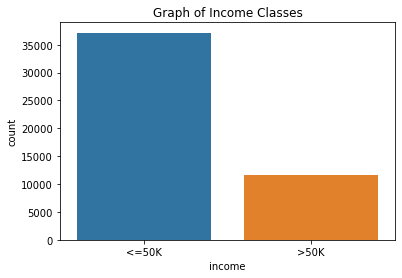

In [54]:
sns.countplot(x = 'income', data = adult)
plt.title('Graph of Income Classes')
plt.show()

### To start, there are more people earing less than 50k than there are earning more than 50k, which would have been normal at this time period.

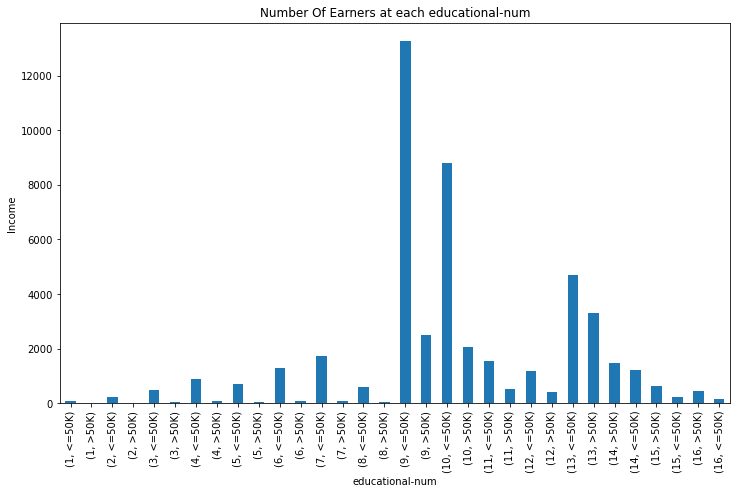

In [56]:
#ax = education.plot(kind = 'bar', title = 'Proportion over Education Levels', figsize = (12, 7))
for feature in discrete_features:
    data = adult.copy()
    ax = data.groupby(feature)['income'].value_counts().plot(kind = 'bar', figsize = (12, 7))
    ax.set_xlabel(feature)
    ax.set_ylabel('Income')
    ax.set_title("Number Of Earners at each " + feature)
    plt.show()




In [57]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
continuous_features

['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

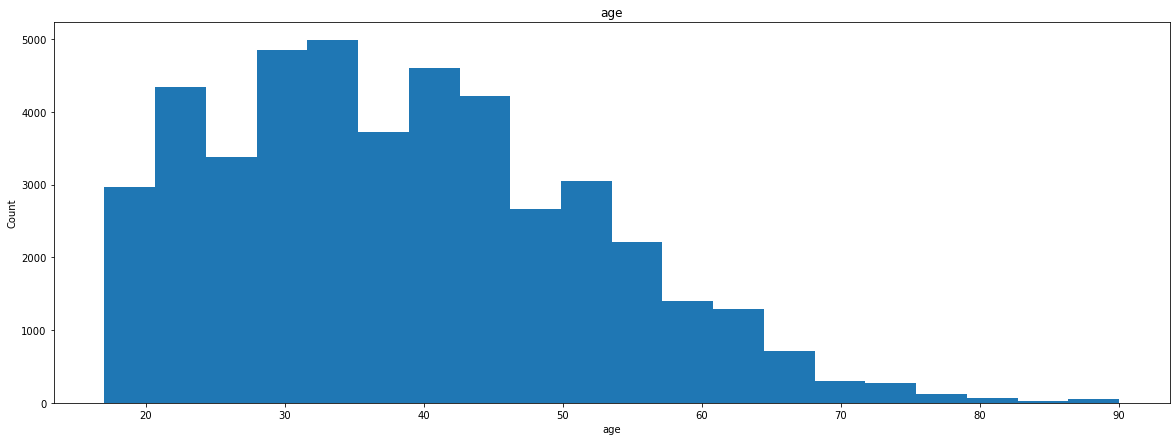

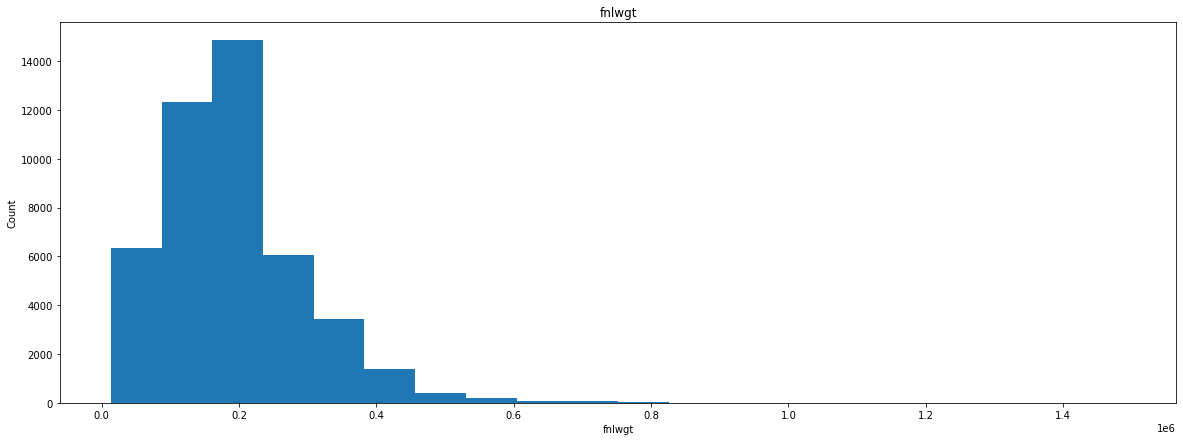

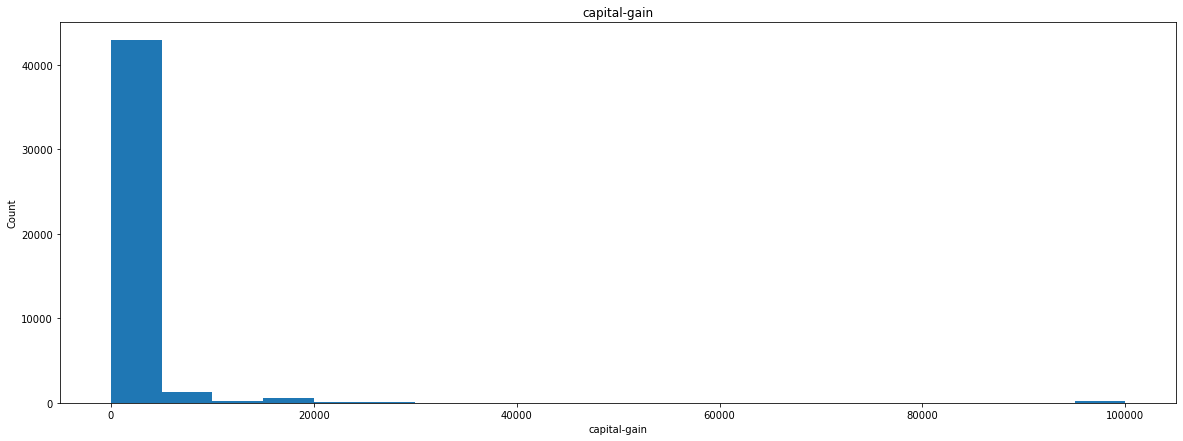

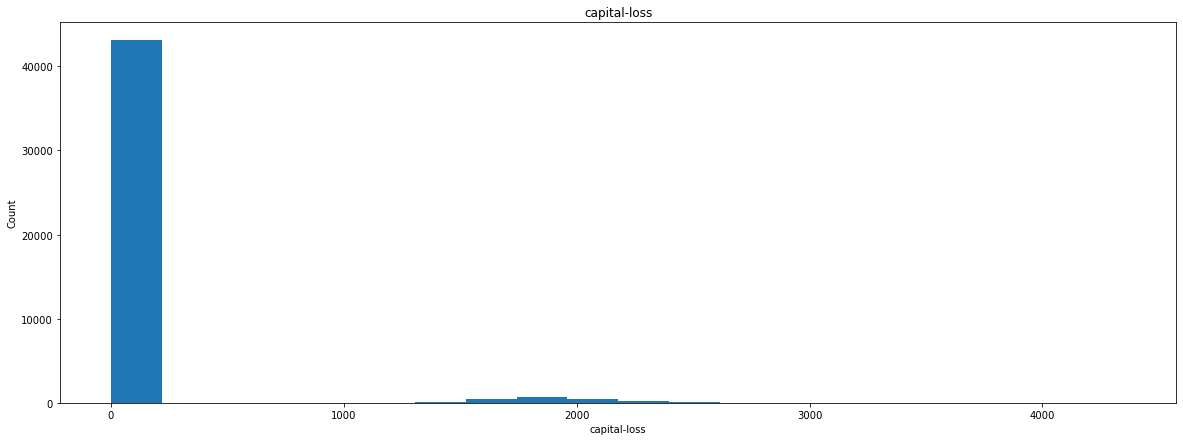

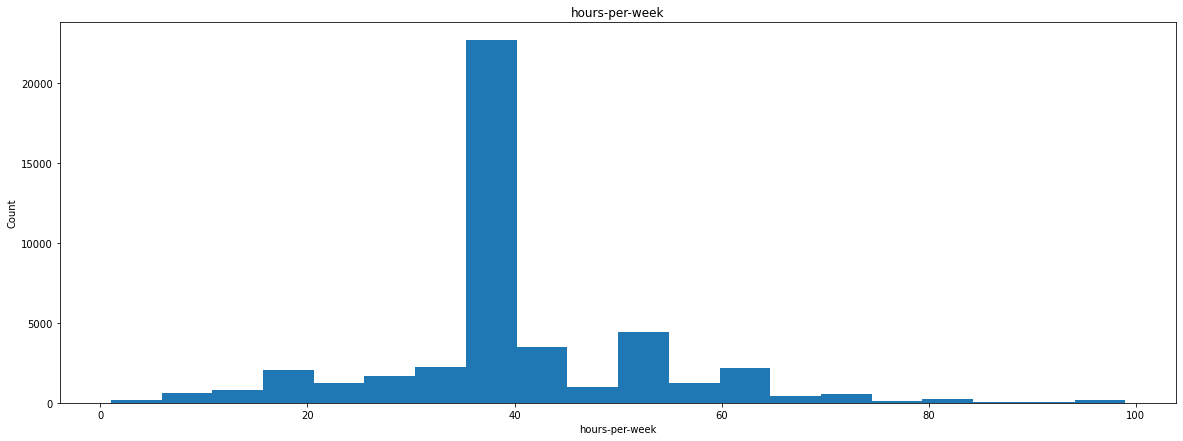

In [83]:

    
for feature in continuous_features:
    data1 = adult_stripped.copy()
    ax = data1[feature].plot(kind = 'hist', bins = 20, figsize = (20, 7))
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.set_title(feature)
    plt.show()

### As the histograms show, the majority of the ages range from 20 to about 55, and the largest number of hours worked is 40 hours per week.

In [59]:
categorical_features = [feature for feature in adult.columns if adult[feature].dtypes == 'O']
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [60]:
data[categorical_features].head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K


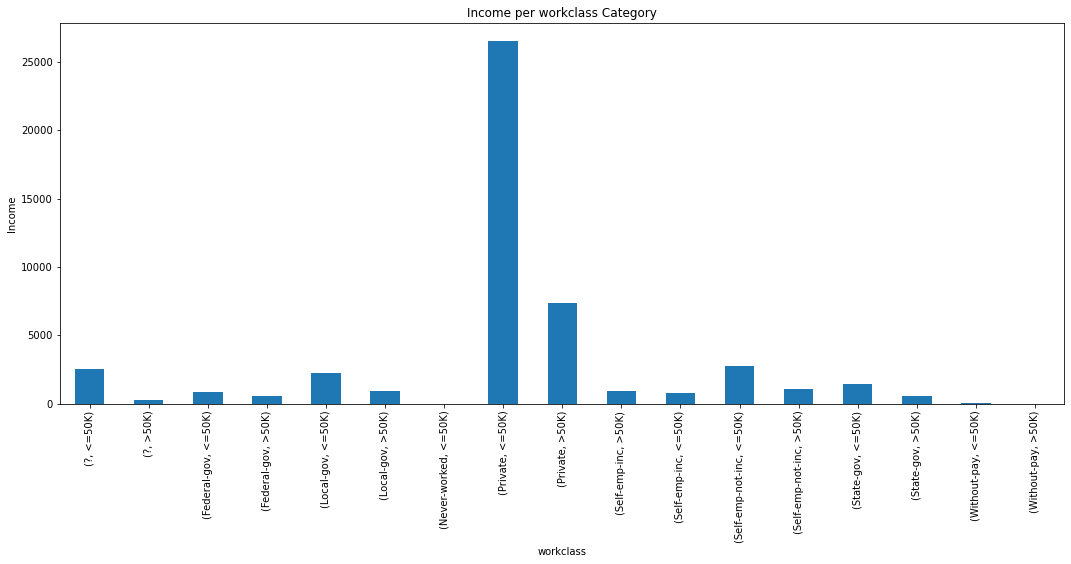

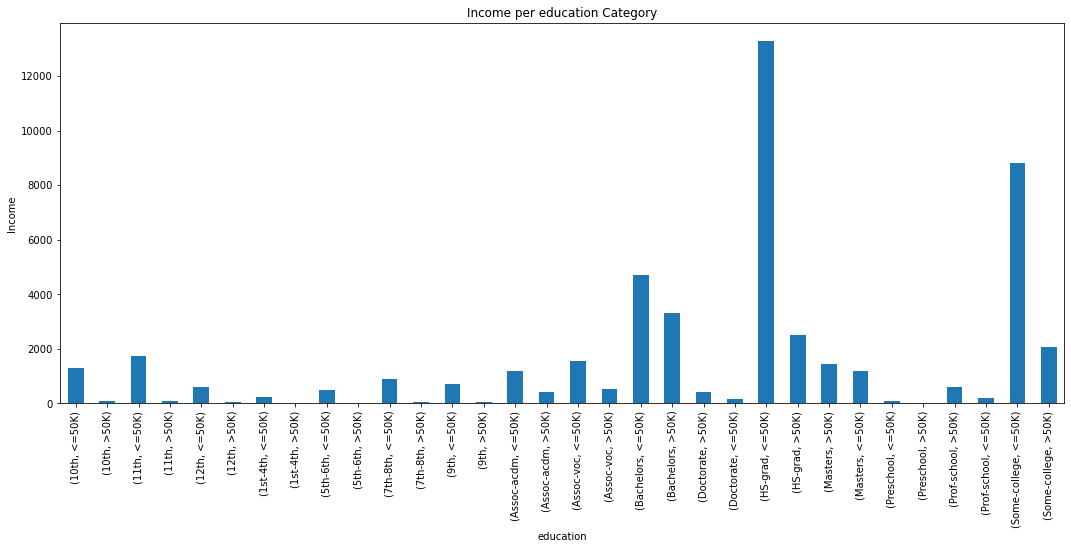

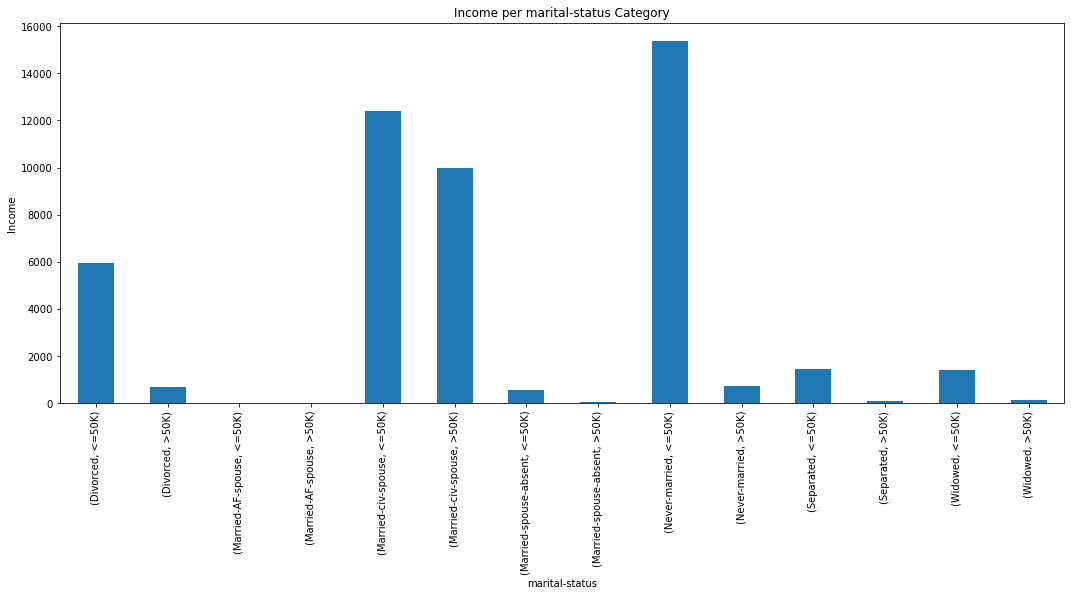

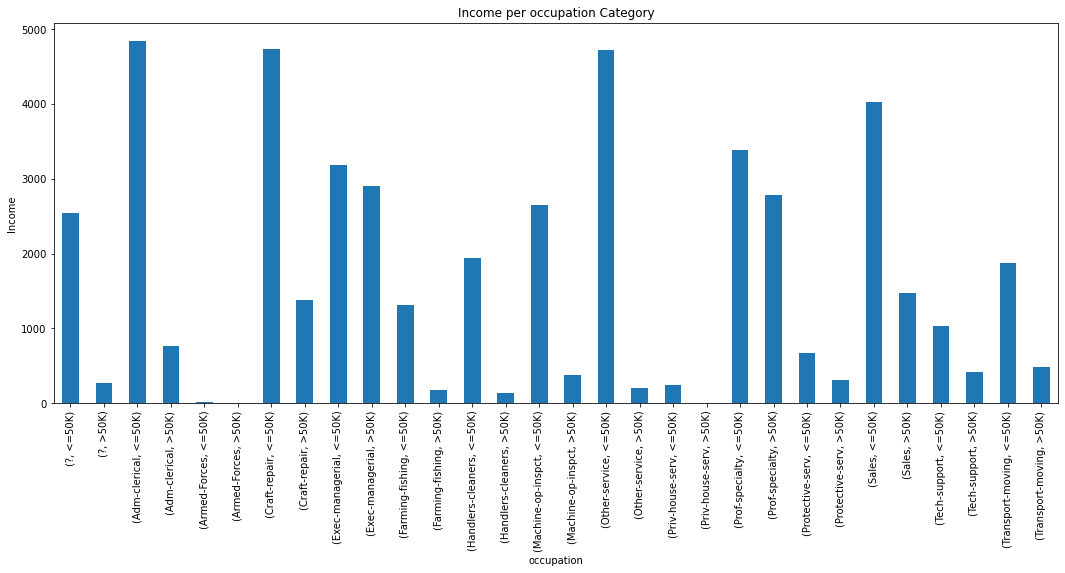

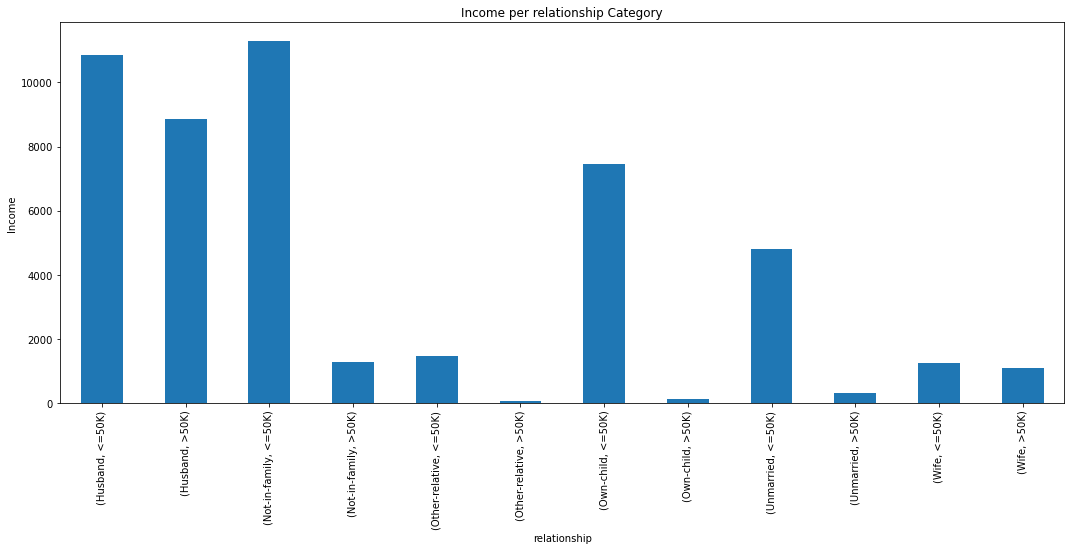

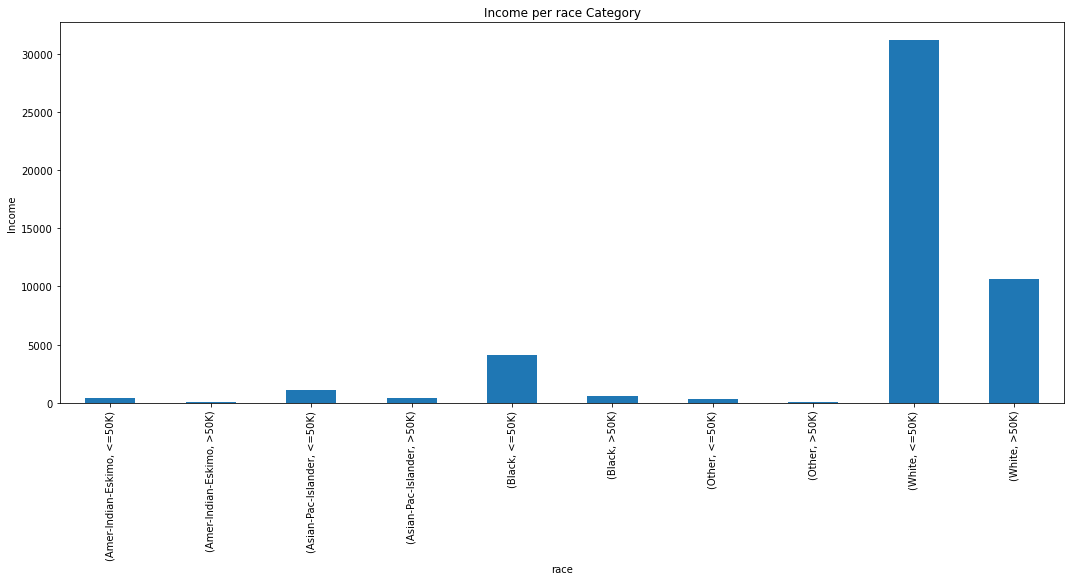

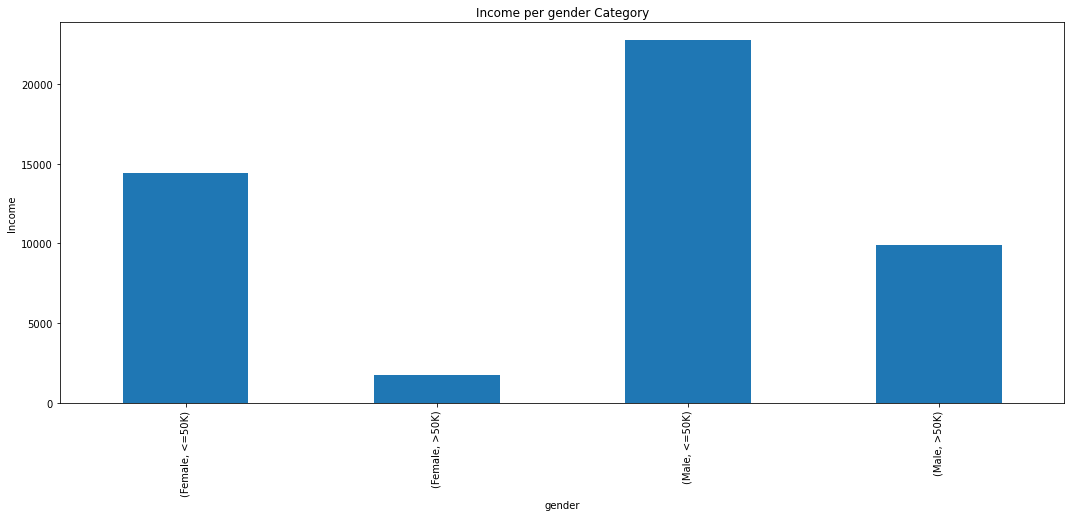

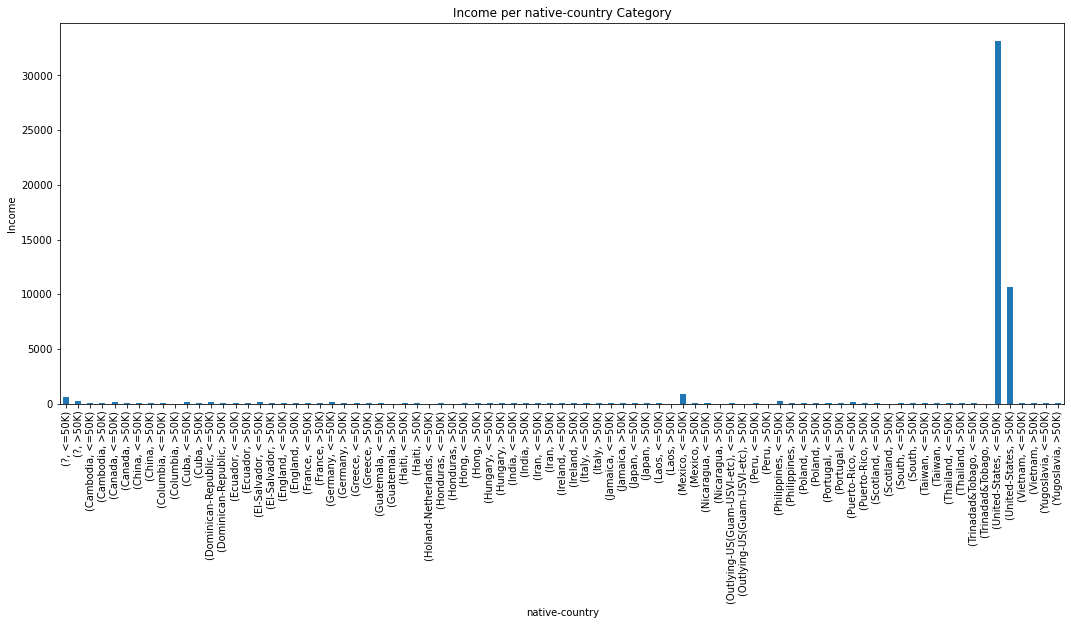

In [61]:

for feature in categorical_features:
    if feature == 'income':
        continue
    data = adult.copy()
    ax = data.groupby(feature)['income'].value_counts().plot(kind = 'bar', figsize = (18, 7))
    ax.set_xlabel(feature)
    ax.set_ylabel('Income')
    ax.set_title("Income per " + feature + " " + "Category")
    plt.show()




### So for most of the work classes, more people make less than 50k, with the exception being those who are self-employed with their own corporation.  This is the same trend with the education level but it changes for Masters level and higher.  Also there are more males making more than 50K than females, and there are more males making less than 50K than females.

### Let's set all the categorical columns to be of type 'category'

In [62]:
for col in (set(adult.columns) - set(adult.describe().columns)):
    adult[col] = adult[col].astype('category')

In [63]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              48842 non-null  int64   
 1   workclass        48842 non-null  category
 2   fnlwgt           48842 non-null  int64   
 3   education        48842 non-null  category
 4   educational-num  48842 non-null  int64   
 5   marital-status   48842 non-null  category
 6   occupation       48842 non-null  category
 7   relationship     48842 non-null  category
 8   race             48842 non-null  category
 9   gender           48842 non-null  category
 10  capital-gain     48842 non-null  int64   
 11  capital-loss     48842 non-null  int64   
 12  hours-per-week   48842 non-null  int64   
 13  native-country   48842 non-null  category
 14  income           48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB


In [17]:
adult_stripped = adult[(adult.workclass != '?')]

In [18]:
adult_stripped = adult_stripped[adult_stripped['occupation'] != '?']

In [19]:
adult_stripped = adult_stripped[adult_stripped['native-country'] != '?']

In [20]:
adult_stripped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              45222 non-null  int64   
 1   workclass        45222 non-null  category
 2   fnlwgt           45222 non-null  int64   
 3   education        45222 non-null  category
 4   educational-num  45222 non-null  int64   
 5   marital-status   45222 non-null  category
 6   occupation       45222 non-null  category
 7   relationship     45222 non-null  category
 8   race             45222 non-null  category
 9   gender           45222 non-null  category
 10  capital-gain     45222 non-null  int64   
 11  capital-loss     45222 non-null  int64   
 12  hours-per-week   45222 non-null  int64   
 13  native-country   45222 non-null  category
 14  income           45222 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.8 MB


In [21]:
adult_stripped['workclass'].value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
?                       0
Never-worked            0
Name: workclass, dtype: int64

#### Not sure why the '?'s still shows up even after they have been removed.  Nevertheless, the 'adult_stripped' dataframe will not be used from this point on; instead I will continue to use the 'adult' dataframe.

### Are the features in this data correlated?  Let's take a look.

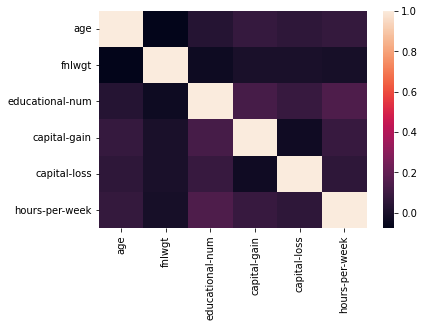

In [84]:
sns.heatmap(adult.corr())
plt.show()

### It seems that there aren't any strong correlations between the predictor features, so they are very independent.  The main relationships, then, are those between the features and the income.

In [64]:
edu_level = {}
for x,y in adult[['educational-num', 'education']].drop_duplicates().itertuples(index = False):
    edu_level[y] = x

In [65]:
edu_level

{'11th': 7,
 'HS-grad': 9,
 'Assoc-acdm': 12,
 'Some-college': 10,
 '10th': 6,
 'Prof-school': 15,
 '7th-8th': 4,
 'Bachelors': 13,
 'Masters': 14,
 'Doctorate': 16,
 '5th-6th': 3,
 'Assoc-voc': 11,
 '9th': 5,
 '12th': 8,
 '1st-4th': 2,
 'Preschool': 1}

### Finally I want to look at various population proportions, starting with the proportion of earner there are in each income category.

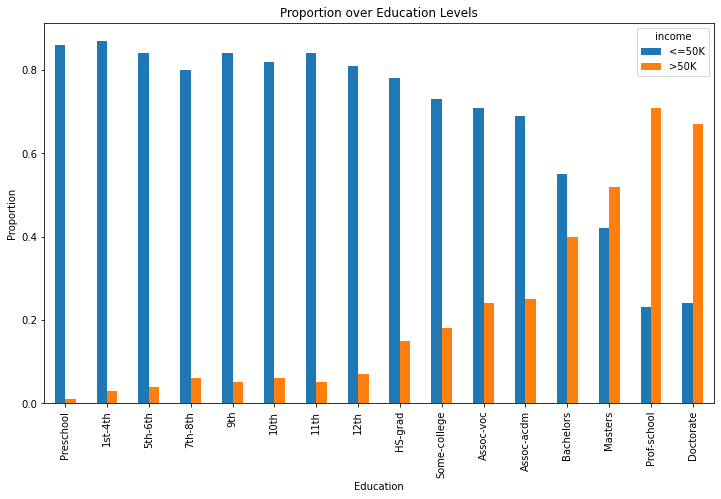

In [85]:
education = round(pd.crosstab(adult.education, adult_stripped.income).div(pd.crosstab(adult.education, adult.income).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key = edu_level.get, reverse = False))
ax = education.plot(kind = 'bar', title = 'Proportion over Education Levels', figsize = (12, 7))
ax.set_xlabel('Education')
ax.set_ylabel('Proportion')
plt.show()

### We see that the number of people earning lower than 50k is disproportionately higher for education levels up to the 12th grade.  After the 12th grade the '>50K' level starts to catch up to the '<=50K', and then it becomes greater at the 'Masters' education level.

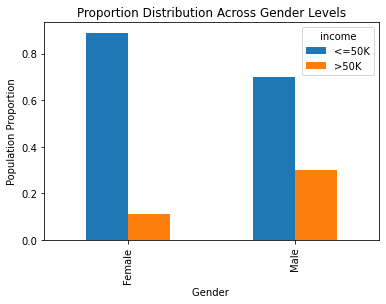

In [67]:
gender = round(pd.crosstab(adult['gender'], adult['income']).div(pd.crosstab(adult['gender'], adult['income']).apply(sum,1),0),2)
gender.sort_values(by = '>50K', inplace = True)
ax = gender.plot(kind = 'bar', title = "Proportion Distribution Across Gender Levels")
ax.set_xlabel('Gender ')
ax.set_ylabel('Population Proportion')
plt.show()

### This bar chart says two things:
### 1) men tend to earn more than women, and 
### 2) there are more than twice as many men earning more than 50K.  This bargraph gives a high-level picture but we can look at this distribution over the work classes.

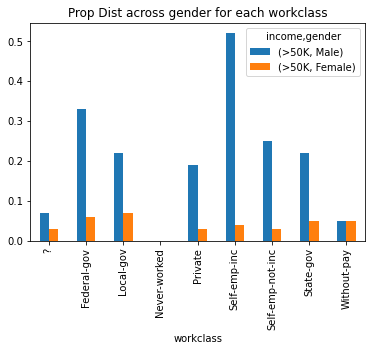

In [68]:
gender_workclass = round(pd.crosstab(adult['workclass'], [adult['income'], adult['gender']]).div(pd.crosstab(adult['workclass'],
                [adult['income'], adult['gender']]).apply(sum,1),0),2)
gender_workclass[[('>50K', 'Male'), ('>50K', 'Female')]].plot(kind = 'bar', title= 'Prop Dist across gender for each workclass')
ax.set_xlabel('Gender')
ax.set_ylabel('Prop of Pop')
plt.show()

### Based on the bar chart, more males make more than 50K in each work class than their female counterparts, and for many of the work classes the proportions are very heavily weighted in favor of males.

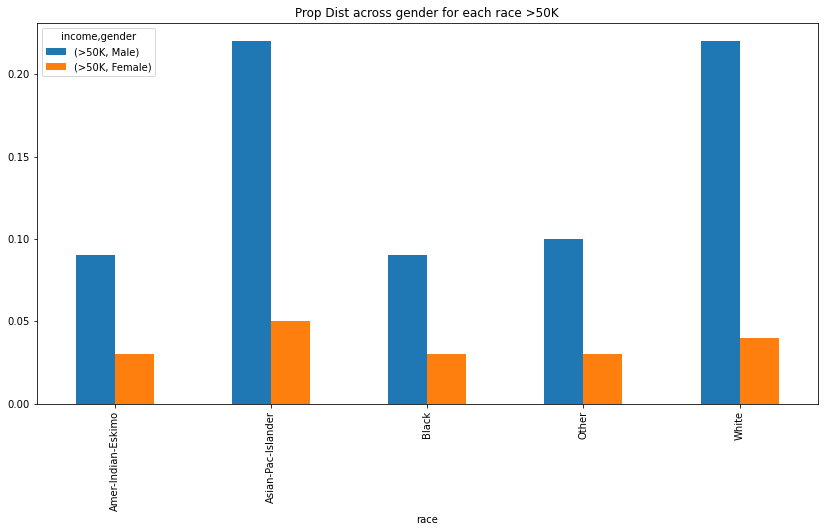

In [69]:
gender_race_over = round(pd.crosstab(adult['race'], [adult['income'], adult['gender']]).div(pd.crosstab(adult['race'],
                [adult['income'], adult['gender']]).apply(sum,1),0),2)
gender_race_over[[('>50K', 'Male'), ('>50K', 'Female')]].plot(kind = 'bar',
                                                              figsize = (14, 7),
                                                              title= 'Prop Dist across gender for each race >50K', fontsize = 10)

plt.show()

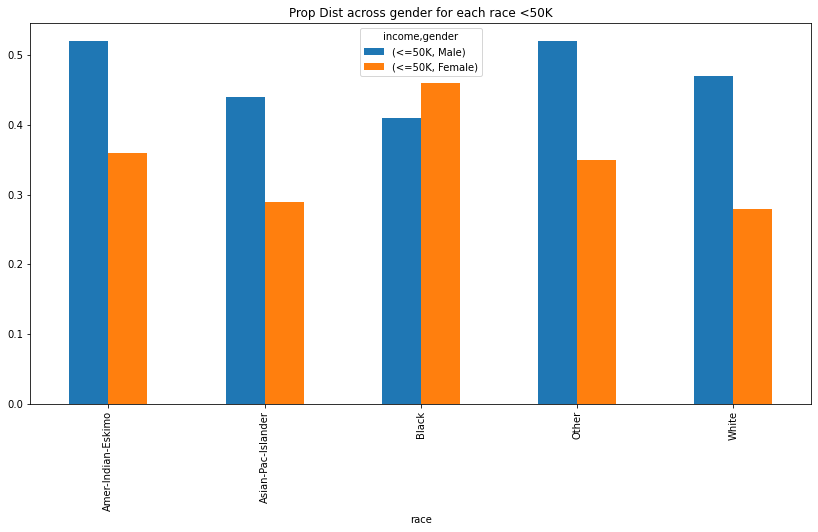

In [70]:
gender_race_under = round(pd.crosstab(adult['race'], [adult['income'], adult['gender']]).div(pd.crosstab(adult['race'],
                [adult['income'], adult['gender']]).apply(sum,1),0),2)
gender_race_under[[('<=50K', 'Male'), ('<=50K', 'Female')]].plot(kind = 'bar', 
                                                                 figsize = (14, 7), 
                                                                 title= 'Prop Dist across gender for each race <50K', fontsize = 10)

plt.show()

### In the first race barchart we see that both White males and Asian-Pacific Islander males are disproportionately more likely to be earing above 50k than males from other races.  We can also see from the 2nd race barchart that of the races listed, the proportion of Black females earning less than 50K is larger than that of Black males whereas it is the opposite for the other races.

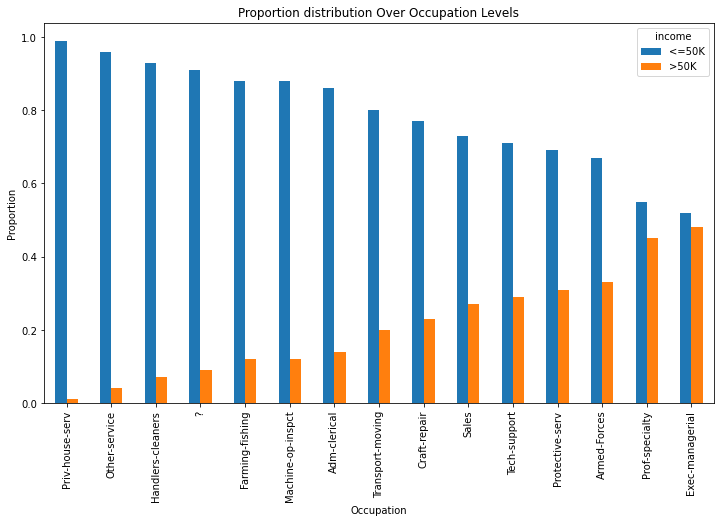

In [71]:
occupation = round(pd.crosstab(adult['occupation'], adult['income']).div(pd.crosstab(adult['occupation'], adult['income']).apply(sum,1),0),2)
occupation.sort_values(by = '>50K', inplace = True)
ax = occupation.plot(kind = 'bar', title = 'Proportion distribution Over Occupation Levels', figsize = (12,7))
ax.set_xlabel('Occupation')
ax.set_ylabel('Proportion')
plt.show()

### The bar chart shows that for each occupation there is a higher proportion of people making less than 50K, but the proportions tend to level off as the occupations increase in technological skills and/or education levels.

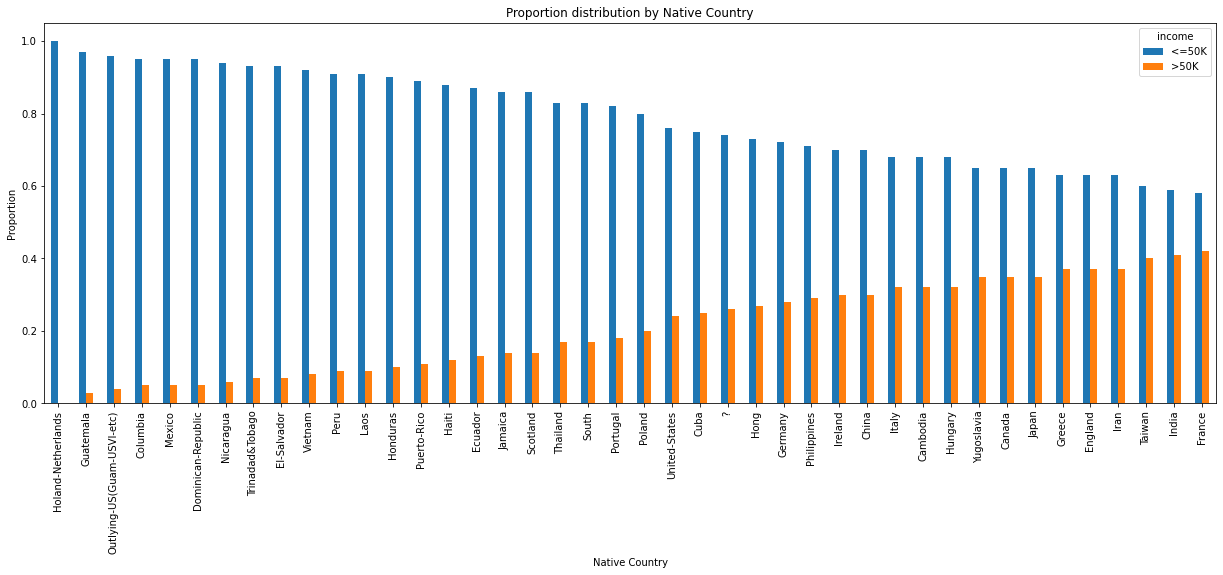

In [82]:
native_country = round(pd.crosstab(adult['native-country'], adult['income']).div(pd.crosstab(adult['native-country'], adult['income']).apply(sum,1),0),2)
native_country.sort_values(by = '>50K', inplace = True)
ax = native_country.plot(kind = 'bar', title = 'Proportion distribution by Native Country', figsize = (21,7))
ax.set_xlabel('Native Country', fontsize = 10)
ax.set_ylabel('Proportion', fontsize = 10)
plt.show()

### The above bar chart shows the proportion of earners of more than 50K and earners of less than 50K.  For many of the countries, less than 20 percent of the people earned more than 50K.  It is surprising to see that in the United States only a little more than 20 percent was earning more than 50K.  It also surprising to see countries that may not be considered as economically powerful (Yugoslavia and Cambodia for example) have higher proportions of people making more than 50K.

### In conclusion, if we are looking to find a person making more than 50K, we would have a good chances by looking for a White male with an advanced education and either working for himself, working in a certain specialty profession or working in the managerial field.  If we are specifically looking to find a female making more than 50K would have the greatest success looking for someone working in the government work class and having an advanced education level.  

### Given that this dataset is from a census taken in 1995 it would be interesting to see how the proportions look for a more recent census.  If a similar census were taken today the chances are great that the income threshold would have increased to some number higher than 50K, perhaps 90K.  Occupations such as Information Technology and Real Estate have gained more popularity, and more people have obtained advanced degrees.  Last but not least, COVID-19 was not a factor in this census, so taking a census after COVID occurred would show changes in work place, incomes and occupations. 